### Student Information
Name: Karin Thawornskulchai

Student ID: 109065710

GitHub ID: K4rinT

Kaggle name: K4rinT (In scoreboard name: 辣油)

Kaggle private scoreboard snapshot:
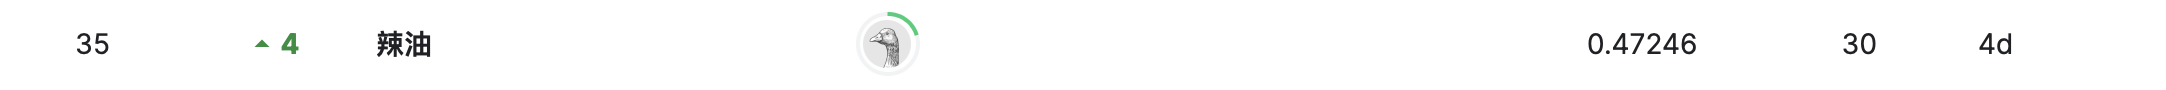

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 15th 11:59 pm, Tuesday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 18th 11:59 pm, Friday)__. 

In [1]:
# - Begin Assignment Here - #

---
# Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic0.png)

---
# 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

# - Load Training data - #
anger_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../input/lab2-dataset/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# - Combine 4 sub-dataset - #
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
# - Load Testing data - #
anger_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../input/lab2-dataset/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# - Combine 4 sub-dataset - #
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# - Take a look at train_df - #
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# - Take a look at test_df - #
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [6]:
# - Shuffle dataset - #
train_df = train_df.sample(frac=1)     # frac will hellp shuffle data #
test_df = test_df.sample(frac=1)

In [7]:
# - Check size of train & test dataframe - #
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)



In [8]:
# - Import library - #
from sklearn.feature_extraction.text import CountVectorizer

# - For train_df - #
count_vect = CountVectorizer()
train_count = count_vect.fit_transform(train_df.text)   # - Learn vocabulary and return document-term matrix - #

# - For test_dt - #
count_vect_1 = CountVectorizer()
test_count = count_vect_1.fit_transform(test_df.text)   # - Learn vocabulary and return document-term matrix - #

In [9]:
# - Take a look at data - #
train_df.text

866     My bus was in a car crash... I'm still shaking...
249     You will never find someone who loved you like...
1801                              STAY JADED everyone is 
3096    Romero is fucking dreadful like seriously my 1...
173     @VanDashNessa @taotao_salupa5 Nobody in that s...
                              ...                        
2538    A cheerful heart is good medicine, but a crush...
1461    Obama admin rejects Texas plan to have refugee...
994     #India right of reply at #UNGA - #Pakistan pre...
181                I got fever highs\nI got boiling blood
1393    #Terrorism can be destroyed easily if #wholewo...
Name: text, Length: 3613, dtype: object

In [10]:
# - Check type of data - #
type(count_vect.get_feature_names_out())

numpy.ndarray

Text(0.5, 1.0, 'Top 30 words frequenct in train_data')

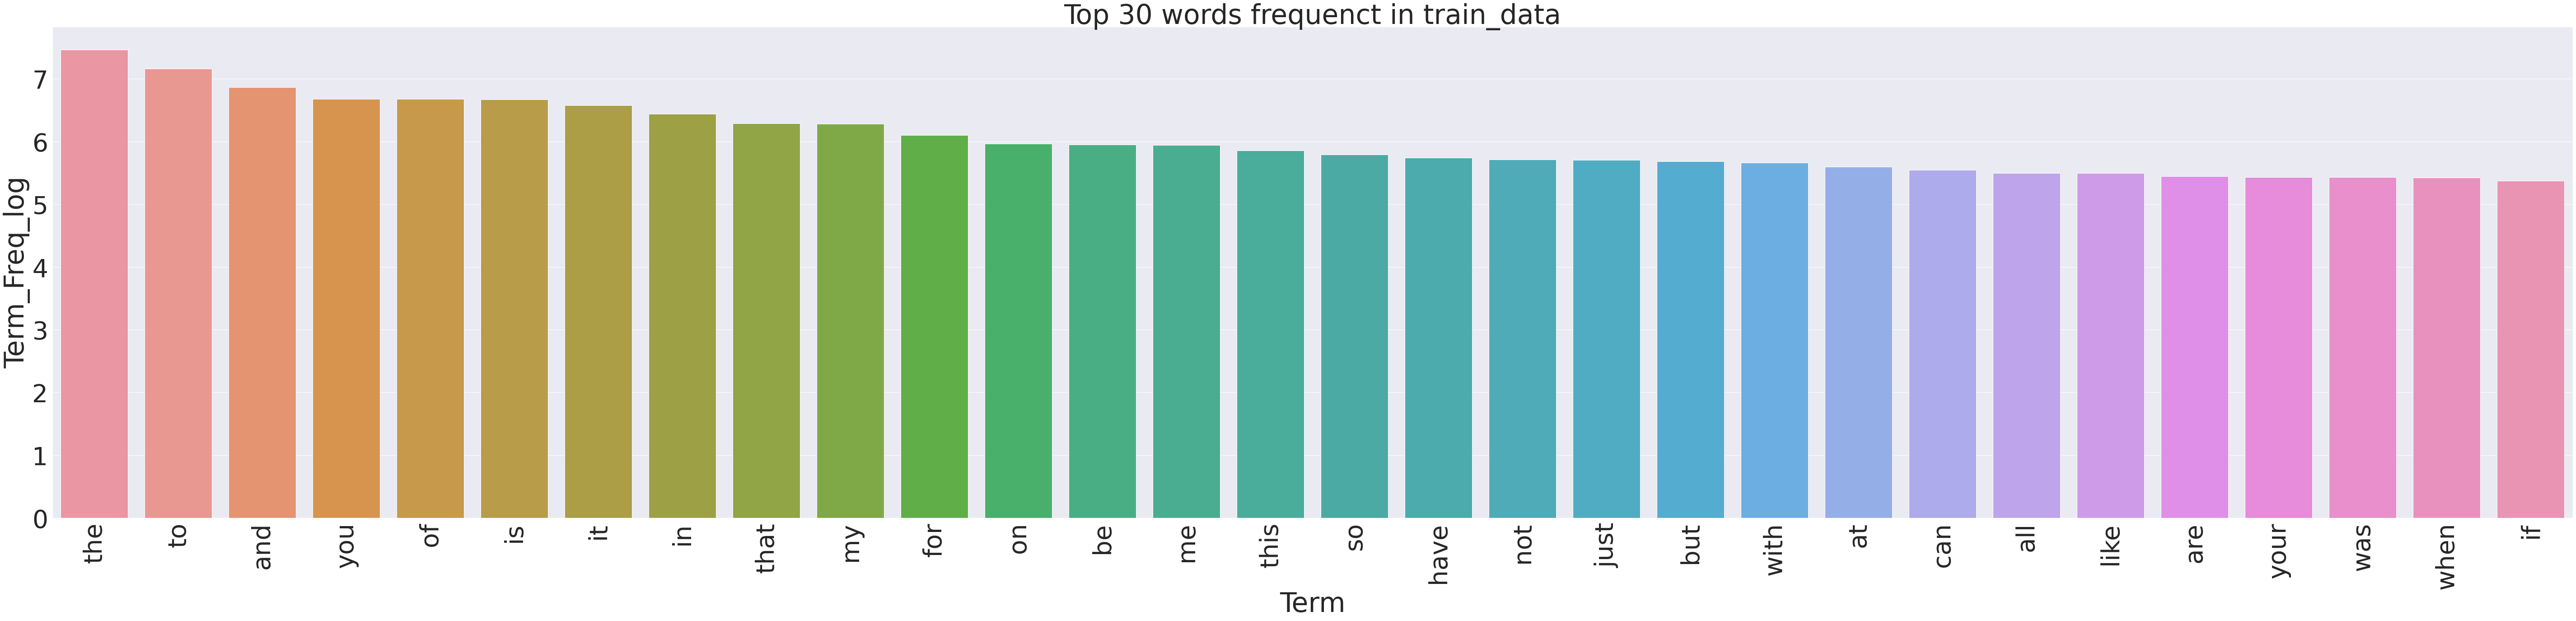

In [11]:
# - Import library - #
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# - Term Frequency for Train data - #
term_freq_train = np.asarray(train_count.sum(axis=0))[0]
term_freq_train_log = [math.log(i) for i in term_freq_train]   # - Will use in sns.barplot - #

# - Dataframe for plot graph - #
df_plotly = pd.DataFrame(count_vect.get_feature_names_out(), columns = ['Term'])
df_plotly['Term_Freq'] = term_freq_train
df_plotly['Term_Freq_log'] = term_freq_train_log

# - Set font_size, Default = 1 - #
sns.set(font_scale=5)

# - Plot graph - #
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in train_data')


Text(0.5, 1.0, 'Top 30 words frequenct in test_data')

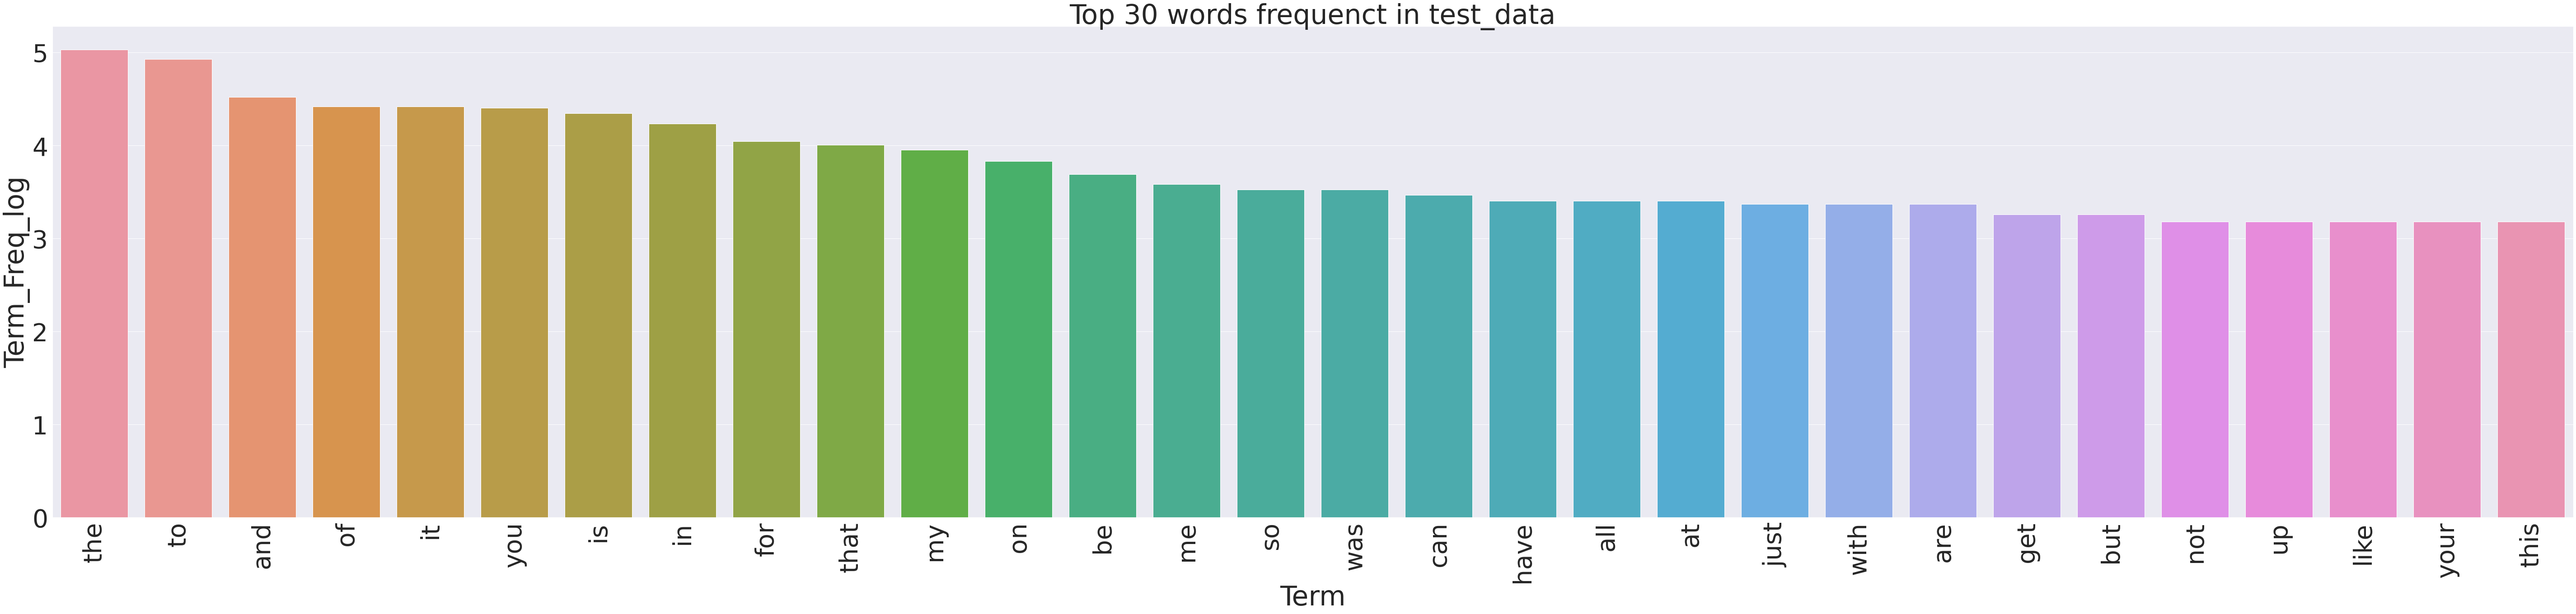

In [12]:
# - Import library - #
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# - Term Frequency for Test data - #
term_freq_test = np.asarray(test_count.sum(axis=0))[0]
term_freq_test_log = [math.log(i) for i in term_freq_test]   # - Will use in sns.barplot - #

# - Dataframe for plot graph - #
df_plotly_1 = pd.DataFrame(count_vect_1.get_feature_names_out(), columns = ['Term'])
df_plotly_1['Term_Freq'] = term_freq_test
df_plotly_1['Term_Freq_log'] = term_freq_test_log

# - Set font_size, Default = 1 - #
sns.set(font_scale=5)

# - Plot graph - #
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly_1.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly_1.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly_1.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in test_data')


---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [13]:
# - Save to pickle file - #
# - Less space & Less loading time, Wide attribute type allowed - #
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [14]:
# - Import library - #
import pandas as pd

# - Load a pickle file - #
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [15]:
# - Group to find distribution - #
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

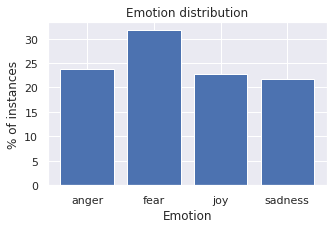

In [16]:
# - Import library - #
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# - The histogram of the data - #
labels = train_df['emotion'].unique()   # - Find all unique in each emotions - #
post_total = len(train_df)              
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

# - Plot graph - #
sns.set(font_scale=1)                   # - Reset font_scale to default - #
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)           # - Bar plot; x = df1.index, y = df1.values - #

# - Arrange - #
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---
# 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [17]:
# - Import library - #
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# - Build analyzers BOW (Bag-of-word) - #
BOW_vectorizer = CountVectorizer() 

In [19]:
# - Learn a vocabulary dictionary of all tokens in the raw documents - #
BOW_vectorizer.fit(train_df['text'])

# - Transform documents to document-term matrix - #
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [20]:
# - Check the result - #
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [21]:
# - Check type of data - #
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [22]:
# - Add .toarray() to show - #
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
# - Check the dimension - #
train_data_BOW_features.shape

(3613, 10115)

In [24]:
# - Observe some feature names - #
feature_names = BOW_vectorizer.get_feature_names_out() # - The result is not yet meaningful - #
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [25]:
# - Drawback emoticon is not included in BOW(Bag-of-word) - #
"😂" in feature_names

False

Let's try using another tokenizer below.

In [26]:
import nltk

# - Build analyzers (bag-of-words) - #
# - nltk train more meaningful - #
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# - Apply analyzer to training data - #
BOW_500.fit(train_df['text'])

# - Transform documents to document-term matrix - #
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# - Check dimension - #
train_data_BOW_features_500.shape    # instead of 10115, it just only 500

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


(3613, 500)

In [27]:
# - Add .toarray() to show - #
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0]])

In [28]:
# - Observe some feature names - #
feature_names_500 = BOW_500.get_feature_names_out()  # Get more meaningful compare to BOW that is random; USING alot!!!
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [29]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# - Build analyzers - #
vectorizer = TfidfVectorizer(max_features = 1000)

# - Learn the vocabulary, and return document-term matrix - #
z = vectorizer.fit_transform(train_df['text'])

# - Take a look at data - #
feature_names_1000 = vectorizer.get_feature_names_out()
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
# 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [31]:
# Sorting them down from the root to leaves #

from sklearn.tree import DecisionTreeClassifier

# - For Classificaiton problem - #
# - You need to provide both training & testing data - #

# - Transform documents to document-term matrix - #
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']   # - Emotion columns - #

# - Transform documents to document-term matrix - #
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']     # - Emotion columns - #

# - Take a look at data dimension is a good habbit - #
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
# - Build DecisionTree model - #
DT_model = DecisionTreeClassifier(random_state=1)   

# - Training! - #
DT_model = DT_model.fit(X_train, y_train)

# - Predict! - #
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# - Take a look at data - #
y_test_pred[:10]

array(['sadness', 'sadness', 'sadness', 'fear', 'fear', 'fear', 'fear',
       'sadness', 'fear', 'anger'], dtype=object)

---
# 4. Results Evaluation

Now we will check the results of our model's performance

In [33]:
# - Import library - #
from sklearn.metrics import accuracy_score    

# - Check accuracy of prediciton - #
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred) 
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))



training accuracy: 0.99
testing accuracy: 0.68


In [34]:
# - Import library - #
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

# - precision will answer out question regarding to what percent of out predict were correct - #
# - recall answer what percent of the positive cases did we catch - #
# - f1-score answer that what percent of positive predictions were correct - #
# - support to answer what is number of the actual occurence of the class - #

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [35]:
# - Import library - #
from sklearn.metrics import confusion_matrix

# - Check by confusion matrix - #
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# - The results are not very clear - #
# - Then we have to do visualization to get it more meaningful - #

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [36]:
# - Import library - #
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# - Funciton for visualizing confusion_matrix - #
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes)) 
    
    # - Show the title and labels - #
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)    # - Display data as an image - #
    ax.figure.colorbar(im, ax=ax)                             # - Add color bar in our plot - #
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    # - Give the number inside the confusion matrix - #
    fmt = 'd'                # - integer presentation type ('d') - #
    thresh = cm.max() / 2.   # - #Thresholds; Above threshold == white font, Below threshold == black font - #
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):   # - Show number in each of labels - #
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

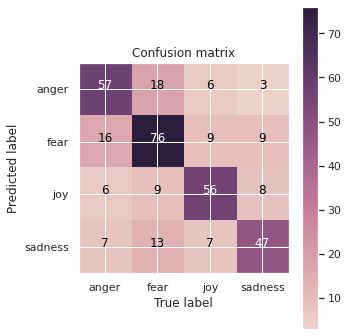

In [37]:
# - Plot your confusion matrix - #
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [38]:
# - Answer here - #

X-axis = True Label,
Y-axis = Predicted Label

Confusion matrix usage to evaluate the quality of the output. In this confusion matrix diagonal element in confusion matrix represent the number of point as you can see in our confusion matrix the diagonal element will be show as below. The diagonal element represent the number of points for which Predicted Label = True Label (show data in `Table 1`)

Meanwhile, off-diagonal elements are those that are mislabeled by the classifier. The higher of the diagonal values of the confusion matrix the better, indicating many correct prediction >> which in the this confusion matrix value = 76 and the value other in the diagonal element also predicted more correctly.

`Table 1:` Diagonal Element of the confusion matrix

<!-- 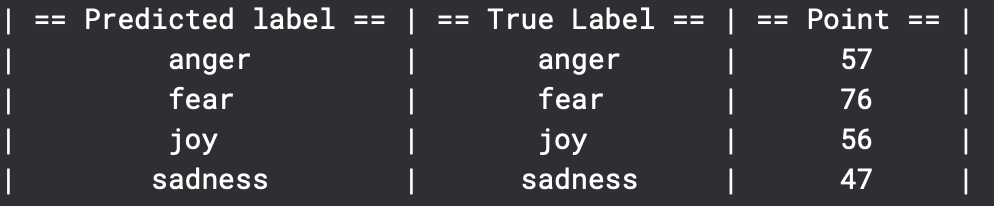 -->
<img src="img/Screen Shot 2565-11-19 at 00.54.36.png" width="500px" height="500px">

`Note:`

(1) I will explained a little bit about the off-diagonal elements,

    such as _True Label_ = anger and _Predicted Label_ = fear
    its mean that the label of this data = anger but the model predicted = fear >> confusion matrix = 16
    
(2) The condition that show in confusion matrix as in white color text and black color text are describe as below.

    (a) White colour text: Checked by threshold = maximum number of confusion matrix ÷ 2 >> 76 ÷ 2 = 38,
        So the element number in confusion matrix that > threshold will show as white colour font
    (b) Black color text: The element number in confusion matrix <= threshold will show as black color text
    
(3) Scale bar at the right of the confusion matrix will show density of the value.

    High density of element number == darker color; Low density of element number == lighter colour


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

#### BOW(NLTK) + Multinomial
Using 500 features

In [39]:
# - Import library - #
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
# - Fit data - #
mnb.fit(X_train, y_train)

# - Predict! - #
_Y_train_pred = mnb.predict(X_train)
_Y_test_pred = mnb.predict(X_test)

In [40]:
# - Import library - #
from sklearn.metrics import accuracy_score  

# - Check accuracy - #
acc_train = accuracy_score(y_true=y_train, y_pred=_Y_train_pred)  
acc_test = accuracy_score(y_true=y_test, y_pred=_Y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [41]:
# - Import library - #
from sklearn.metrics import classification_report 

print(classification_report(y_true=y_test, y_pred=_Y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [42]:
# - Import library - #
from sklearn.metrics import confusion_matrix

# - Check by confusion matrix - #
cm_ = confusion_matrix(y_true=y_test, y_pred=_Y_test_pred) 
print(cm_)

# - The results are not very clear - #
# - Then we have to do visualization to get it more meaningful - #

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


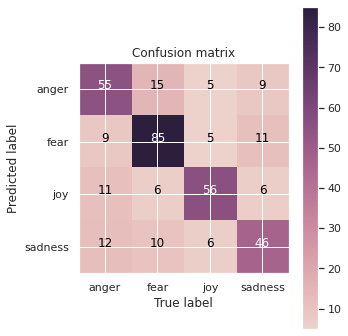

In [43]:
# - Plot confusion matrix - #
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [44]:
# - Answer here - #

__Fig 1:__ Confusion Matrix between `Decision Tree` v.s. `Multinomial Naive Bayes`

<!-- 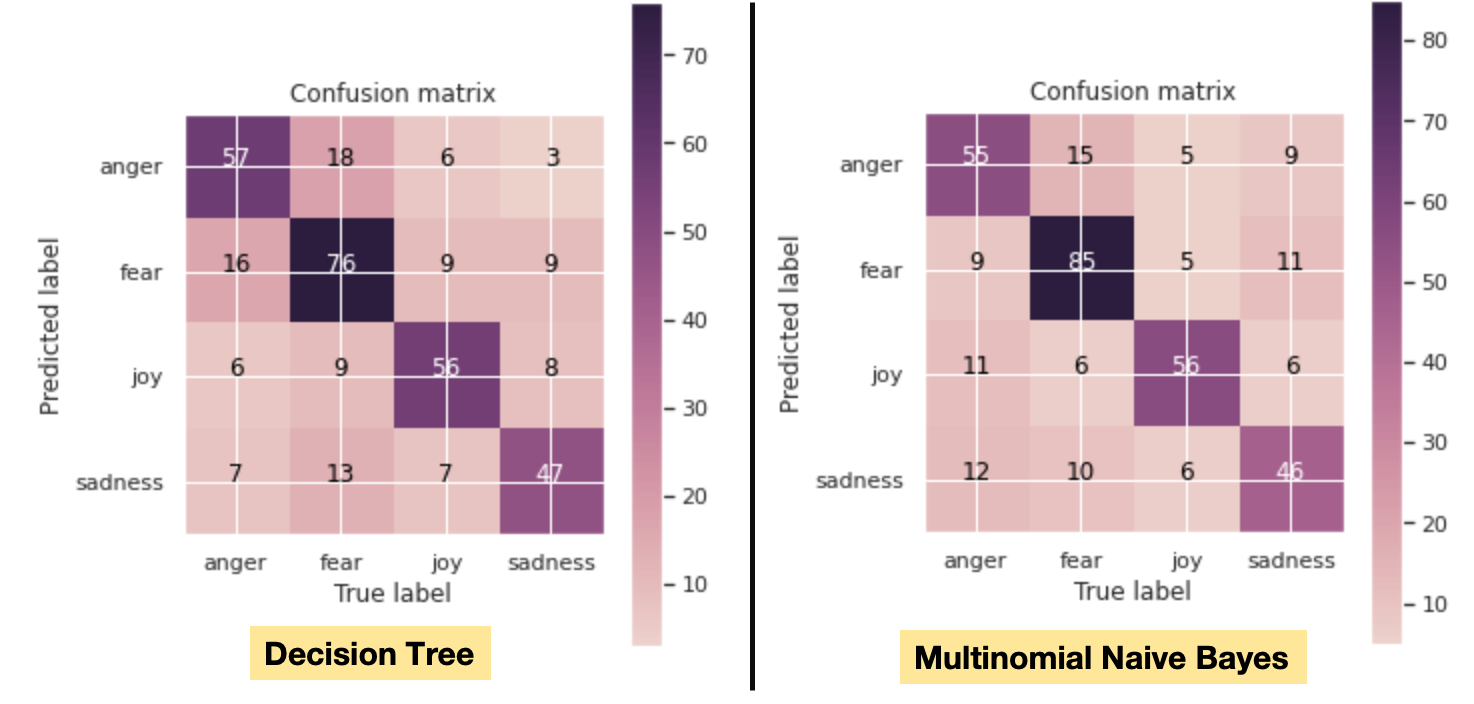 -->
<img src="img/Screen Shot 2565-11-19 at 16.43.28.png" width="500px" height="700px">

__Decision Tree__

- Training accuracy: 0.99
- Test accuracy: 0.68

__Multinomial Naive Bayes__

- Training accuracy: 0.79
- Test accuracy: 0.7

From above result, we can see that on the training data set __Decision Tree__ model performed better than __Multinomial Naive Bayes__ (0.99 & 0.79) but on the testing data set __Multinomial Naive Bayes__ performed better than __Decision Tree__

In addition, confusion matrix of the these 2 model can tell us that __Multinomial Naive Bayes__ can predicted `True positve` in `fear label` better than __Decision Tree__ (other label these 2 model are almost the same)


The reason why training accuracy of __Decision Tree__ is better than __Naive Bayes__ because __Decision Tree__ is a discriminative model which has prunning method that may neglect some key values in training data, so the training accuracy of __Decision Tree__ better than __Naive Bayes__ which is a generative model, and also another reason is why __Decision Tree's__ training accuracy is high because it might occur overfitting problem that the __Decision Tree__ model trained the training data too well.

The reason why testing accuracy of __Naive Bayes__ is better than __Decision Tree__ because __Naive Bayes__ is a generative models that need fewer data to trained compared with discriminative models (we input quantity the same for both of model) since generative models are more biased as they make stronger assumption i.e, assumption of conditional independence; if the assumption of conditional independence was not violates, model will have more accurate than discriminative model (As in this time the test accuracy of __Naive Bayes__ is more accurate than __Decision Tree__)

Another difference that I detected is __Decision Tree__ has more missclassify than __Naived Bayes__ which this is the drawback of discriminative model(Decision Tree), in this difference generative model(Naive Bayes) performed better than discriminative model(Decision Tree)

** Detect from the density (colour) of the confusion matrix plot. **

__Note:__

- Discriminative model like a __Decision Tree__ is more robust to outlier.
- Generative model has major drawback - if there's a presence of outlier in the dataset >> affects this model to a significant extent.
- Generative model rely of Bayes theorem to find joint probability(statistical model), so it can tackle more complex task than analogous discriminative models.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering), such as: Word2Vec,PCA,LDA,FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
# 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic1.png)

### 6.1 Prepare data (X, y)

In [45]:
import keras

# - Standardize name (X, y) - #
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# - Check dimension is a good habbit - #
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.



In [46]:
# - Deal with label (string -> one-hot) - #

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical  

label_encoder = LabelEncoder()   # - Non numerical to numerical - #
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return to_categorical(enc)    # - Encode character formac to specialize format - #

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)          # - Decode specialize format to character format - #

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

# - After convert is one hot encoding - #

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 866        fear
249       anger
1801       fear
3096    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [47]:
# - I/O check -#
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic2.png)

In [48]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# - input layer - #
model_input = Input(shape=(input_shape, ))  
X = model_input

# - 1st hidden layer - #
X_W1 = Dense(units=64)(X) 
H1 = ReLU()(X_W1)                

# - 2nd hidden layer - #
H1_W2 = Dense(units=64)(H1) 
H2 = ReLU()(H1_W2)

# - output layer - #
H2_W3 = Dense(units=output_shape)(H2)  
H3 = Softmax()(H2_W3)

model_output = H3

# - Create model - #
model = Model(inputs=[model_input], outputs=[model_output])

# - loss function & optimizer >> Dealing with sparse data >> Text also sparse - #
# - optimizer = 'adam' >> handle sparse - #
# - loss = categorical_crossentropy >> handle one-hot encoding - #

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# - show model construction - #
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

2022-11-27 03:46:29.162428: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### 6.4 Train

In [49]:
# - Import library - #
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')   # - Keep data in CSVLogger - #

# - training setting - #
epochs = 25      # - Iterate 25 times - #
batch_size = 32  # - Pass 32 sample in 1 times - #

# - training! - #
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))  # - callback >> save to csv_logger - #
print('training finish')

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
2022-11-27 03:46:29.997237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


113/113 [==============================] - 2s 4ms/step - loss: 1.3165 - accuracy: 0.3745 - val_loss: 1.2504 - val_accuracy: 0.4669
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.6443 - val_loss: 0.9311 - val_accuracy: 0.6571
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7993 - val_loss: 0.8193 - val_accuracy: 0.6830
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8539 - val_loss: 0.8454 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8849 - val_loss: 0.8603 - val_accuracy: 0.6744
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9114 - val_loss: 0.9479 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9291 - val_loss: 1.0228 - val_accuracy: 0.6628
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [50]:
# - Predict! - #
pred_result = model.predict(X_test, batch_size=128)   # sample = 128
pred_result[:5]

array([[5.29240072e-01, 4.16915208e-01, 9.12990887e-03, 4.47147414e-02],
       [1.03465468e-01, 7.10312307e-01, 2.55463552e-03, 1.83667585e-01],
       [6.30823569e-03, 7.42479519e-04, 4.73131604e-06, 9.92944539e-01],
       [9.95289445e-01, 3.87504161e-03, 7.75694134e-05, 7.57915666e-04],
       [5.14745712e-01, 4.84362513e-01, 1.35856835e-05, 8.78178806e-04]],
      dtype=float32)

In [51]:
# - Decode to make it human understanding - #

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'sadness', 'anger', 'anger'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.63


In [53]:
#- Let's take a look at the training log - #
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.374481,1.316549,0.466859,1.250402
1,1,0.644340,0.960029,0.657061,0.931145
2,2,0.799336,0.570608,0.682997,0.819286
3,3,0.853861,0.406287,0.674352,0.845438
4,4,0.884860,0.324188,0.674352,0.860264
5,5,0.911431,0.260521,0.674352,0.947874
6,6,0.929145,0.213005,0.662824,1.022750
7,7,0.941600,0.181724,0.657061,1.087251
8,8,0.951841,0.152516,0.651297,1.153754
9,9,0.960697,0.133401,0.634006,1.227926


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic3.png)![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic4.png)

In [54]:
# - Answer here - #

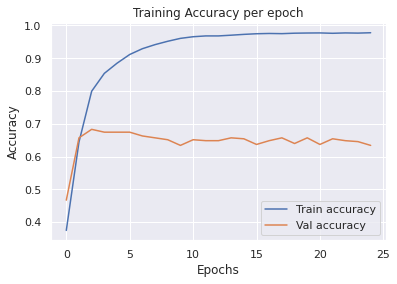

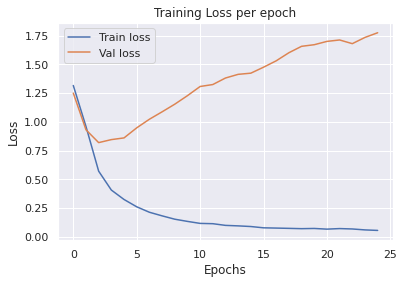

In [55]:
# - Import library - #
import matplotlib.pyplot as plt

# - Plot Training Accuracy per epoch - #
training_log[['accuracy', 'val_accuracy']].plot(kind = 'line', title = 'Training Accuracy per epoch',
                                                rot = 0, xlabel = 'Epochs', ylabel = 'Accuracy')

plt.legend(['Train accuracy', 'Val accuracy'])

# - Plot Training Loss per epoch - #

training_log[['loss', 'val_loss']].plot(kind = 'line', title = 'Training Loss per epoch',
                                                rot = 0, xlabel = 'Epochs', ylabel = 'Loss')
plt.legend(['Train loss', 'Val loss'])

__Answer__

In this graph I can interpret as below,

__Training accuracy per epoch__

From the epoch 0 to 25 `train accuracy` which check accuracy on the train data increase from every of epoch until 10 and then start to stable until 25. Meanwhile, `Val accuracy` which check accuracy from the test data increase from epoch 0 to epoch 1 and then drop from epoch 2 or 3 (I am not sure with the scale, value was estimated) then epoch 4 it increase accuracy again and after that it about to stable until epoch 25.

__Training loss per epoch__

`train loss` which check loss on the train data, `Val loss` which check loss from test data as we can see from epoch 0 to 1 it decrease from high value to low value (we expected this trend because it mean than the loss is decrease)

`train loss` is still decrease till epoch 25, `Val loss` is decrease till about epoch 4 (estimated) and then started to increase till epoch 25.

From the detail that I mentioned above, it related with concept overfitting because we train a lot of time(epoch) train accuracy is so high; increase from epoch to epoch and Train loss is also decreasing relate with Train accuracy but the Val loss is after epoch about 4 (estimated) it started increase and increase till epoch 25 >> its mean that train data perform so well because we train it a lot but the Val data performed not well.

We can solve this overfitting by reduce training, reduce complexity.


---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
# 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [56]:
# - check library - #
import gensim

# - ignore warnings - #
import warnings
warnings.filterwarnings('ignore')

# - if you want to see the training messages, you can use it - #
# - import logging - #
# - logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) - #

# - the input type - #
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
866,20009,My bus was in a car crash... I'm still shaking...,"[My, bus, was, in, a, car, crash, ..., I, 'm, ..."
249,10249,You will never find someone who loved you like...,"[You, will, never, find, someone, who, loved, ..."
1801,20944,STAY JADED everyone is,"[STAY, JADED, everyone, is]"
3096,40269,Romero is fucking dreadful like seriously my 1...,"[Romero, is, fucking, dreadful, like, seriousl..."
173,10173,@VanDashNessa @taotao_salupa5 Nobody in that s...,"[@, VanDashNessa, @, taotao_salupa5, Nobody, i..."


In [57]:
# - create the training corpus - #
training_corpus = train_df['text_tokenized'].values   # - Using values to create training corpus - #
training_corpus[:3]

array([list(['My', 'bus', 'was', 'in', 'a', 'car', 'crash', '...', 'I', "'m", 'still', 'shaking', 'a', 'bit', '...', 'This', 'week', 'was', 'an', 'absolute', 'horror', 'and', 'this', 'was', 'the', 'icing', 'on', 'the', 'cake', '...']),
       list(['You', 'will', 'never', 'find', 'someone', 'who', 'loved', 'you', 'like', 'I', 'did', '.', 'And', 'that', 'my', 'love', ',', 'will', 'be', 'my', 'revenge', '.']),
       list(['STAY', 'JADED', 'everyone', 'is'])], dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [58]:
# - the input type - #
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
866,20009,My bus was in a car crash... I'm still shaking...,"[My, bus, was, in, a, car, crash, ..., I, 'm, ..."
249,10249,You will never find someone who loved you like...,"[You, will, never, find, someone, who, loved, ..."
1801,20944,STAY JADED everyone is,"[STAY, JADED, everyone, is]"
3096,40269,Romero is fucking dreadful like seriously my 1...,"[Romero, is, fucking, dreadful, like, seriousl..."
173,10173,@VanDashNessa @taotao_salupa5 Nobody in that s...,"[@, VanDashNessa, @, taotao_salupa5, Nobody, i..."


In [59]:
from gensim.models import Word2Vec

# - setting - #
vector_dim = 100       # - Can change depend on corpus data - #
window_size = 5        # - Sliding window interval - #
min_count = 1          # - The lowest count that we want to train - #
training_epochs = 20   # - Iterate - #

# - model - #
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 7.3 Generating word vector (embeddings)

In [60]:
# - get the corresponding vector of a word - #
# - in this is happy - #

word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.69746184,  0.39239582,  0.05435576,  0.06283686, -0.38218492,
       -0.811738  ,  0.87099683,  1.5467912 , -0.02695498, -0.7396643 ,
       -0.36122853, -0.73935133, -0.36515215,  0.03630843, -0.11859003,
       -0.2928604 ,  0.49197564, -0.77538604,  0.3701919 , -0.9838322 ,
        0.45928025,  0.9993549 ,  0.4343237 ,  0.25956127,  0.5541111 ,
        0.19228011, -0.3333469 ,  0.5322761 , -0.59732693, -0.12257119,
        0.1202582 , -0.14032973,  0.58527166, -0.7043868 , -0.28232813,
        0.61098075,  0.12572919, -0.15287773, -0.72647554, -0.293861  ,
       -0.3044072 , -0.03977637, -0.7001543 , -0.01644478,  0.62741405,
       -0.8661724 , -1.0711367 ,  0.8717723 ,  0.1127621 ,  0.5207641 ,
        0.12230773, -0.69732124, -0.15943462, -0.04572004, -0.36255944,
       -0.3488677 ,  0.06273276,  0.35777885,  0.2584787 ,  0.07276398,
        0.24297746, -0.8183094 ,  0.77539617,  0.09344106, -0.80047935,
        0.5786279 ,  0.04890108,  0.34017414, -1.0960381 ,  0.45

In [61]:
# - Get the most similar words - #
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9220475554466248),
 ("'you", 0.9205994606018066),
 ('establishment', 0.9107906222343445),
 ('memories😊', 0.9050725102424622),
 ('help', 0.9040182828903198),
 ('birthday', 0.9026983976364136),
 ('infuriate', 0.8974753022193909),
 ('bday', 0.8967663645744324),
 ('real', 0.8952770233154297),
 ('cats', 0.894279420375824)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [62]:
from gensim.models import KeyedVectors

# - Note: this model is very huge, this will take some time - #
model_path = "../input/googlenews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
# - Gensim = library - #
# - File already in library.. only recall it - #

import gensim.downloader as api

# - If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this: - #
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [65]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

# - Focus on positive and remove negative - #

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?



In [ ]:
# - Answer here - #

We can utilize these "word" vector to represent the sentence data and train model by using 2 model
- Continuous bag-of-words model: predicts the middle words(Target word) based on surrounding context words. The context consists of few words before and after the current (middle) word. This model the order of words in the context is not important, and also it can not capture the rare words as in the skip-gram model.
- Contunuous skip-gram model: predicts words within certain range (window size) before and after the current word in the same sentence. The context word is specified by the window length. The advantage of this model: It can capture rare words and capture the similarity of word semantics.


# 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



#### Basic concept

<!-- ![image.png](https://camo.githubusercontent.com/630f4ff082ed061752822d94fce7b3da1f841301be6d5a3ee529d0bfe9186f87/68747470733a2f2f692e696d6775722e636f6d2f504564556635342e706e67) -->
<img src="img/Screen Shot 2565-11-27 at 14.29.17.png">

In [66]:
# - K-mean unsupervised - #

# - clustering target - #
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# - convert to word vector - #
X = [word2vec_model.wv[word] for word in target_list]

# - Once we have target_list, we can convert to word vector - #

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [67]:
from sklearn.cluster import KMeans

# - we have to decide how many cluster (k) we want - #
k = 2  # - 2 groups - #

# - k-means model - #
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# - cluster result - #
cluster_result = kmeans_model.labels_

# - show - #
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic6.png)

In [68]:
#- check cluster membership - #
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [69]:
# - check cluster membership - #
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


# 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![image.png](https://raw.githubusercontent.com/keziatamus/DM2022-Lab2-Master/08755efc671824064d7a9347edb8c418550c3e83//pics/pic7.png)

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target?

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [70]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

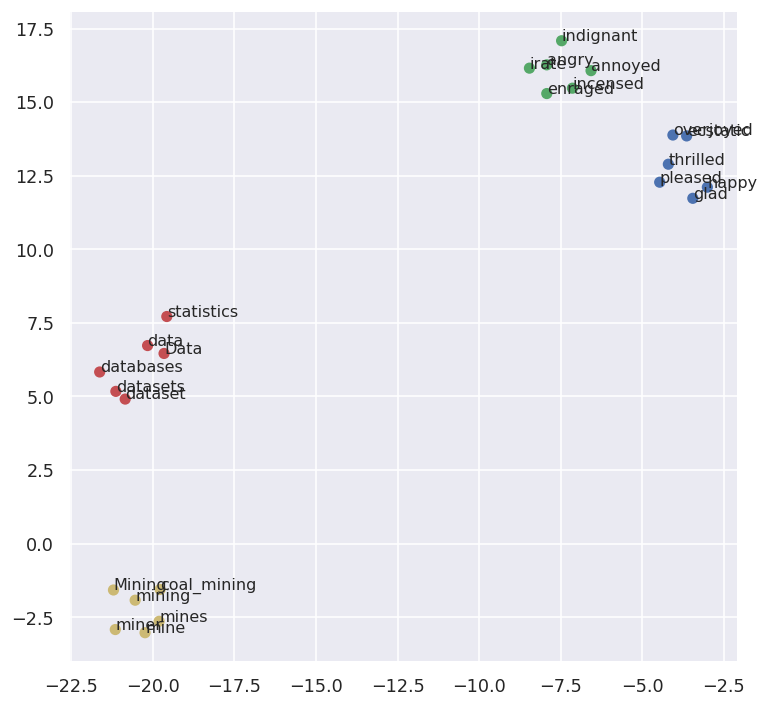

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# - w2v model - #
model = w2v_google_model

# - prepare training word vectors - #
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# - t-SNE model - #
tsne = TSNE(n_components=2, metric='cosine', random_state=28)    # Embeddin space = 2(n_components)

# - training - #
X_tsne = tsne.fit_transform(X_train)

# - plot the result - #
plt.figure(figsize=(7.5, 7.5), dpi=115)  # - dpi resolution dot-per-inch - #
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')      # - Annotate word in the plot - #
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
# Answer here #

In [72]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', sad_words)
print('mining_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
data_words:  ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
mining_words:  ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy'

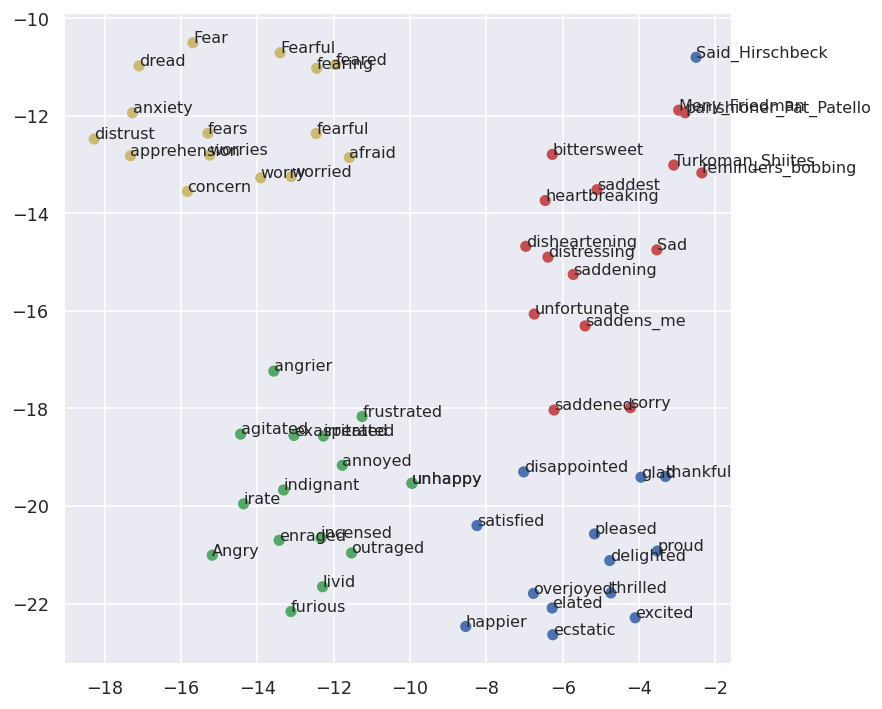

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# - w2v model - #
model = w2v_google_model

# - prepare training word vectors - #
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# - t-SNE model - #
tsne = TSNE(n_components=2, metric='cosine', random_state=28)    # Embeddin space = 2(n_components)

# - training - #
X_tsne = tsne.fit_transform(X_train)

# - plot the result - #
plt.figure(figsize=(7.5, 7.5), dpi=115)  # - dpi resolution dot-per-inch - #
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')    # - Annotate word in the plot - #
plt.show()

---